## Вариант №3.

Для заданного набора данных произведите масштабирование данных (для одного признака) и преобразование категориальных признаков в количественные двумя способами (label encoding, one hot encoding) для одного признака. Какие методы Вы использовали для решения задачи и почему?

In [0]:
!pip install -U -q PyDrive
import os
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

    100% |████████████████████████████████| 993kB 16.8MB/s 


In [0]:
# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
# choose a local (colab) directory to store the data.
local_download_path = os.path.expanduser('~/data')
try:
  os.makedirs(local_download_path)
except: pass

In [0]:
# 2. Auto-iterate using the query syntax
#    https://developers.google.com/drive/v2/web/search-parameters
file_list = drive.ListFile(
    {'q': "title='marvel-wikia-data.csv'"}).GetList()

In [0]:
for f in file_list:
  # 3. Create & download by id.
  print('title: %s, id: %s' % (f['title'], f['id']))
  fname = os.path.join(local_download_path, f['title'])
  print('downloading to {}'.format(fname))
  f_ = drive.CreateFile({'id': f['id']})
  f_.GetContentFile(fname)

title: marvel-wikia-data.csv, id: 13cxPBv_yFaIDde7XczTL31j3bo7013s0
downloading to /root/data/marvel-wikia-data.csv


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

In [0]:
data = pd.read_csv(fname, sep=",")
# data = data.dropna(axis=0, how='any')

In [0]:
data.head(10)

,page_id,name,urlslug,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,Year
0,1678,Spider-Man (Peter Parker),\/Spider-Man_(Peter_Parker),Secret Identity,Good Characters,Hazel Eyes,Brown Hair,Male Characters,NaN,Living Characters,4043.0,Aug-62,1962.0
1,7139,Captain America (Steven Rogers),\/Captain_America_(Steven_Rogers),Public Identity,Good Characters,Blue Eyes,White Hair,Male Characters,NaN,Living Characters,3360.0,Mar-41,1941.0
2,64786,"Wolverine (James \""Logan\"" Howlett)",\/Wolverine_(James_%22Logan%22_Howlett),Public Identity,Neutral Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,3061.0,Oct-74,1974.0
3,1868,"Iron Man (Anthony \""Tony\"" Stark)",\/Iron_Man_(Anthony_%22Tony%22_Stark),Public Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,2961.0,Mar-63,1963.0
4,2460,Thor (Thor Odinson),\/Thor_(Thor_Odinson),No Dual Identity,Good Characters,Blue Eyes,Blond Hair,Male Characters,NaN,Living Characters,2258.0,Nov-50,1950.0
5,2458,Benjamin Grimm (Earth-616),\/Benjamin_Grimm_(Earth-616),Public Identity,Good Characters,Blue Eyes,No Hair,Male Characters,NaN,Living Characters,2255.0,Nov-61,1961.0
6,2166,Reed Richards (Earth-616),\/Reed_Richards_(Earth-616),Public Identity,Good Characters,Brown Eyes,Brown Hair,Male Characters,NaN,Living Characters,2072.0,Nov-61,1961.0
7,1833,Hulk (Robert Bruce Banner),\/Hulk_(Robert_Bruce_Banner),Public Identity,Good Characters,Brown Eyes,Brown Hair,Male Characters,NaN,Living Characters,2017.0,May-62,1962.0
8,29481,Scott Summers (Earth-616),\/Scott_Summers_(Earth-616),Public Identity,Neutral Characters,Brown Eyes,Brown Hair,Male Characters,NaN,Living Characters,1955.0,Sep-63,1963.0
9,1837,Jonathan Storm (Earth-616),\/Jonathan_Storm_(Earth-616),Public Identity,Good Characters,Blue Eyes,Blond Hair,Male Characters,NaN,Living Characters,1934.0,Nov-61,1961.0


In [0]:
data.shape

(16376, 13)

In [0]:
data.dtypes

page_id               int64
name                 object
urlslug              object
ID                   object
ALIGN                object
EYE                  object
HAIR                 object
SEX                  object
GSM                  object
ALIVE                object
APPEARANCES         float64
FIRST APPEARANCE     object
Year                float64
dtype: object

In [0]:
data.isnull().sum()

page_id                 0
name                    0
urlslug                 0
ID                   3770
ALIGN                2812
EYE                  9767
HAIR                 4264
SEX                   854
GSM                 16286
ALIVE                   3
APPEARANCES          1096
FIRST APPEARANCE      815
Year                  815
dtype: int64

In [0]:
from sklearn.preprocessing import StandardScaler

/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:780: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:781: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


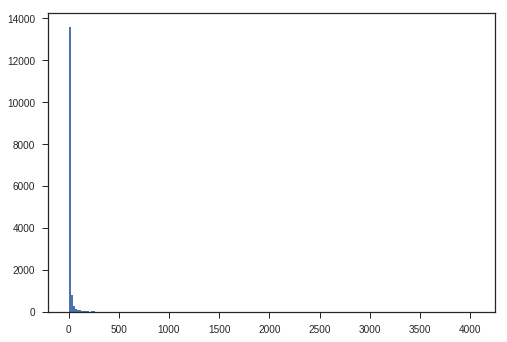

In [0]:
plt.hist(data['APPEARANCES'], 200)
plt.show()

In [0]:
z = StandardScaler()
z_data = z.fit_transform(data[['APPEARANCES']])

/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:780: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:781: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


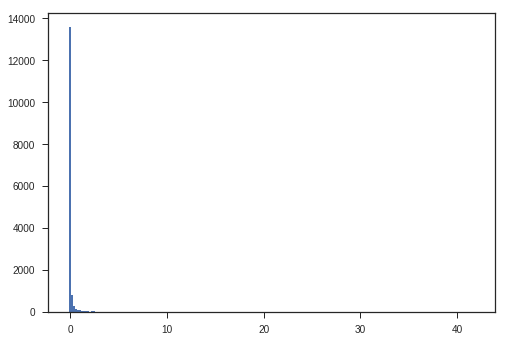

In [0]:
plt.hist(z_data, 200)
plt.show()

In [0]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
cat_temp_data = data[['ALIVE']]

In [0]:
cat_temp_data['ALIVE'].unique()

array(['Living Characters', 'Deceased Characters', nan], dtype=object)

In [0]:
from sklearn.impute import SimpleImputer

In [0]:
# Импьютация наиболее частыми значениями
imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
data_imp = imp.fit_transform(cat_temp_data)

In [0]:
np.unique(data_imp)

array(['Deceased Characters', 'Living Characters'], dtype=object)

In [0]:
cat_enc = pd.DataFrame({'c1':data_imp2.T[0]})
cat_enc.tail(20)

,c1
16356,Living Characters
16357,Living Characters
16358,Living Characters
16359,Living Characters
16360,Living Characters
16361,Deceased Characters
16362,Living Characters
16363,Living Characters
16364,Living Characters
16365,Deceased Characters


In [0]:
data2 = pd.get_dummies(cat_enc['c1'])
data2.tail(20)

,Deceased Characters,Living Characters
16356,0,1
16357,0,1
16358,0,1
16359,0,1
16360,0,1
16361,1,0
16362,0,1
16363,0,1
16364,0,1
16365,1,0


In [0]:
data3 = data.join(data2)

In [0]:
from sklearn.preprocessing import LabelEncoder

In [0]:
le = LabelEncoder()
cat_enc_le = le.fit_transform(cat_enc['c1'])

In [0]:
cat_enc['c1'].unique()

array(['Living Characters', 'Deceased Characters'], dtype=object)

In [0]:
np.unique(cat_enc_le)

array([0, 1])

In [0]:
le.inverse_transform([x for x in range(2)])

array(['Deceased Characters', 'Living Characters'], dtype=object)

In [0]:
cat_enc_le

array([1, 1, 1, ..., 1, 1, 1])

In [0]:
data3['ALIVE'] = cat_enc_le
data3.tail(20)

,page_id,name,urlslug,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,Year,Deceased Characters,Living Characters
16356,473710,Yamata no Orichi (Earth-616),\/Yamata_no_Orichi_(Earth-616),Public Identity,Bad Characters,NaN,No Hair,Male Characters,NaN,1,NaN,NaN,NaN,0,1
16357,670512,Zero G. Priestly (Legion Personality) (Earth-616),\/Zero_G._Priestly_(Legion_Personality)_(Earth...,Secret Identity,Neutral Characters,NaN,NaN,Male Characters,NaN,1,NaN,NaN,NaN,0,1
16358,12132,Zora Loftus (Earth-616),\/Zora_Loftus_(Earth-616),Secret Identity,Bad Characters,NaN,Blond Hair,Female Characters,NaN,1,NaN,NaN,NaN,0,1
16359,727035,Agar (Earth-616),\/Agar_(Earth-616),No Dual Identity,Bad Characters,Black Eyes,No Hair,Male Characters,NaN,1,NaN,NaN,NaN,0,1
16360,703546,Ana (Natasha Romanoff's neighbor) (Earth-616),\/Ana_(Natasha_Romanoff%27s_neighbor)_(Earth-616),No Dual Identity,Good Characters,Black Eyes,Grey Hair,Female Characters,NaN,1,NaN,NaN,NaN,0,1
16361,713903,Dante's mother (Earth-616),\/Dante%27s_mother_(Earth-616),No Dual Identity,Neutral Characters,NaN,NaN,Female Characters,NaN,0,NaN,NaN,NaN,1,0
16362,508693,Farbauti (Earth-616),\/Farbauti_(Earth-616),Public Identity,Bad Characters,Red Eyes,NaN,Female Characters,NaN,1,NaN,NaN,NaN,0,1
16363,694577,Finch (Kate Bishop's neighbor) (Earth-616),\/Finch_(Kate_Bishop%27s_neighbor)_(Earth-616),Public Identity,Good Characters,Black Eyes,Bald,Male Characters,Homosexual Characters,1,NaN,NaN,NaN,0,1
16364,655292,Jack O'Lantern (Impostor) (Earth-616),\/Jack_O%27Lantern_(Impostor)_(Earth-616),Secret Identity,Bad Characters,Hazel Eyes,Bald,Male Characters,NaN,1,NaN,NaN,NaN,0,1
16365,684262,K'thol (Earth-616),\/K%27thol_(Earth-616),NaN,Good Characters,NaN,NaN,Male Characters,NaN,0,NaN,NaN,NaN,1,0
